In [1]:
import torchaudio
import IPython.display as ipd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

from model import *
from dataset import *
from const import *
from train import *

Post net diff:  tensor(0.0749)
Target spectrogram


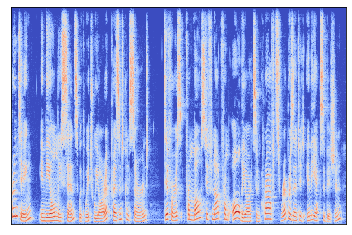

Predicted spectrogram


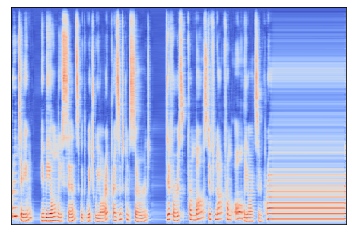

Before postnet


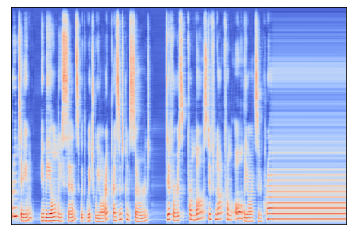

In [208]:
from singlefit import *
def single_inference():
    net = SingleDecoder()
    #sd_path = 'data/ckpts/singlefit/single_latest.sd'
    sd_path = 'data/ckpts/single_1999.sd'
    net.load_state_dict(torch.load(sd_path))
    ds, loader = get_lj_loader(batch_size=1, limit=1, get_dataset=True)
    net.to(device)
    net.eval()
    with torch.no_grad():
        for batch in loader:
            S_pad, S_lengths, token_pad, token_lengths = batch
            S_pad = S_pad.to(device)
            S_before, S_pred = net(S_pad, teacher_forcing=False, before_post=True)
    S_orig = S_pad[:, 0, :].cpu()
    S_recon = S_pred[:, 0, :].cpu()
    S_before = S_before[:, 0, :].cpu()
    print("Post net diff: ", torch.mean(torch.abs(S_recon-S_before)))
    print("Target spectrogram")
    librosa.display.specshow(S_orig.numpy().T)
    plt.show()
    print("Predicted spectrogram")
    librosa.display.specshow(S_recon.numpy().T)
    plt.show()
    print("Before postnet")
    librosa.display.specshow(S_before.numpy().T)
    plt.show()
    recon_wav = ds.spec_to_wav(S_recon)
    sr = 22050
    librosa.output.write_wav('data/pred_sample.wav', recon_wav.squeeze().numpy(), sr)
single_inference()

In [ ]:
def torch_reconstruct_demo():
    sr = 22050
    ds = LinSpecDataset(torchaudio.datasets.LJSPEECH('./data'), limit=1)
    orig_wav, _, _, _ = ds.base_ds[0]
    orig_S = ds.wav_to_spec(orig_wav)
    print(orig_S.shape)
    recon_wav = ds.spec_to_wav(orig_S)
    librosa.output.write_wav('data/recon_sample.wav', recon_wav.squeeze().numpy(), sr)
torch_reconstruct_demo()

In [137]:
ipd.Audio('data/orig_sample.wav')

In [20]:
ipd.Audio('data/recon_sample.wav')

In [209]:
ipd.Audio('data/pred_sample.wav')